<a href="https://colab.research.google.com/github/arpitgothi/Machine-learning/blob/master/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Multi Class Classification (KNN)
Select Dataset of your choice and respond to following questions.

**Q1: Why you want to apply Classification on selected dataset? Discuss full story behind dataset.**

Ans: As dataset Contains many Columns such as 'RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type'.Among them Outcome Column is one dependent variable.Which indicates that the 7 different types of glasses.

So here the output or target value will be seven differnt types of outcome. so it is a multi class classification problem.

So here we can use K- nearest neighbour classification for Multiclass class Classification.

KNN is a non-parametric and lazy learning algorithm. Non-parametric means there is no assumption for underlying data distribution. In other words, the model structure determined from the dataset. This will be very helpful in practice where most of the real world datasets do not follow mathematical theoretical assumptions. Lazy algorithm means it does not need any training data points for model generation. All training data used in the testing phase. 



**Q2: How many total observations in data?**

Ans: 214 rows × 10 columns

**Q3: How many independent variables?**

Ans: There are total 10 columns out of which 9 columns independent  variable.Here, Except 'Type' Column all other columns are independent.

**Q4: Which is dependent variable?**

Ans: 'Type' is dependent variable which is indicating that the the 7 different types of glasses.

**Q5: Which are most useful variable in estimation? Prove using correlation.**

Ans: Here, data has only 9 independent variable which has linear correlation with dependent variable.

If there are more than one independent variable, not all independent variables contributes equally in estimation of dependent variable. This can be quatified using correlation between dependent and independent variable.

corr function is sklearn can be used to find correlation between variables. We can find correlation of each independent variable with dependent vatiable using loop, store them in a list/dataframe, sort them and finally decide which varible to use in delveloping model.


**Q6: Quantify goodness of your model and discuss steps taken for improvement.**

Ans:  Goodness of the model can be defined by accuracy of model for different value of k.

For better results, normalizing data on the same scale is highly recommended. Generally, the normalization range considered between 0 and 1. KNN is not suitable for the large dimensional data. In such cases, dimension needs to reduce to improve the performance. Also, handling missing values will help us in improving results.

**Q7: Can we use KNN for regression also? Why / Why not?**

Ans: KNN algorithm can be used for both classification and regression problems. The KNN algorithm uses ‘feature similarity’ to predict the values of any new data points. This means that the new point is assigned a value based on how closely it resembles the points in the training set. From our example, we know that ID11 has height and age similar to ID1 and ID5, so the weight would also approximately be the same.


**Q8: Discuss drawbacks of algorithms such as KNN.**

Ans: The testing phase of K-nearest neighbor classification is slower and costlier in terms of time and memory. It requires large memory for storing the entire training dataset for prediction. KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. Euclidean distance is sensitive to magnitudes. The features with high magnitudes will weight more than features with low magnitudes. KNN also not suitable for large dimensional data.

In [0]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier

from google.colab import files


Text(0.5,1,'Count of Glass Types')

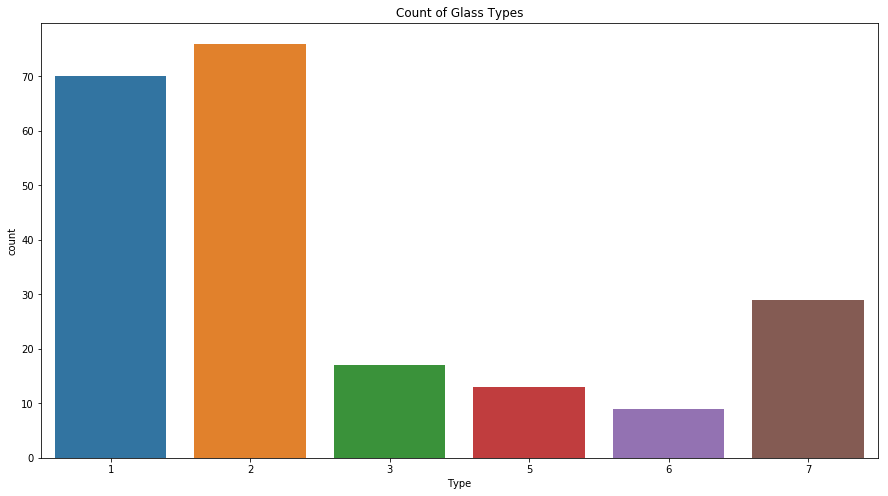

In [2]:
import seaborn as sns 
df=pd.read_csv("glass.csv")
features = df.columns[:-1].tolist()
df.describe()
plt.subplots(figsize = (15,8))
sns.countplot('Type',data=df).set_title('Count of Glass Types')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [0]:
X = df[features] 
y = df['Type'] 
# set a seed and a test size for splitting the dataset 
seed = 7
test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size , random_state = seed)

In [0]:
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

0.6744186046511628
0.6511627906976745
0.6046511627906976
0.5581395348837209
0.5813953488372093
0.5813953488372093
0.5348837209302325
0.6046511627906976


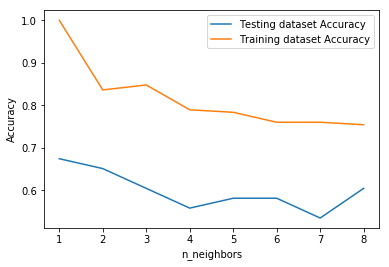

In [7]:
neighbors = np.arange(1, 9) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 
    print(test_accuracy[i])
  
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 
  
plt.legend() 
plt.xlabel('n_neighbors') 
plt.ylabel('Accuracy') 
plt.show() 

In [0]:
from sklearn.neighbors import KNeighborsClassifier

#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=3)

#Train the model using the training sets
knn.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [9]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

('Accuracy:', 0.6046511627906976)
